# Principal Component Analysis

In [1]:
import numpy as np

In [2]:
D = np.matrix([[1, -7, 9],
               [2, 5, 11],
               [4, 6, -5],
               [-3, 9, 12],
               [8, 1, -2]])

alpha = 0.9

# n -> number of rows , d -> number of columns
n, d = D.shape

In [ ]:
mean = D.sum(axis=0, dtype='float') / n
mean

matrix([[2.4, 2.8, 5. ]])

In [ ]:
# mean remove
temp = np.matmul(np.full((n, 1), 1), mean)
D_bar = np.subtract(D, temp)
D_bar

matrix([[ -1.4,  -9.8,   4. ],
        [ -0.4,   2.2,   6. ],
        [  1.6,   3.2, -10. ],
        [ -5.4,   6.2,   7. ],
        [  5.6,  -1.8,  -7. ]])

In [ ]:
# covariance matrix
temp = np.matmul(D_bar.transpose(), D_bar)
s = (1/n) * temp
s

matrix([[ 13.04,  -5.12, -20.2 ],
        [ -5.12,  30.56,  -0.4 ],
        [-20.2 ,  -0.4 ,  50.  ]])

In [ ]:
# eigen values and vectors
e, v = np.linalg.eig(s)

# '-1 *' for sorting in descending order
ind = np.argsort(-1 * e)

e = e[ind]
v = v[:,ind]

print("eigen values: ")
print(e)
print("eigen vectors: ")
print(v)

eigen values: 
[59.0008299  31.31983443  3.27933567]
eigen vectors: 
[[-0.40726249  0.13598789 -0.90313042]
 [ 0.06049971 -0.98266411 -0.17524565]
 [ 0.91130513  0.12601011 -0.39197501]]


In [ ]:
# f(r)
f_r = np.full((d), 1, dtype='float')
for r in range(0, d):
  f_r[r] = e[:r+1].sum(axis=0, dtype='float') / e.sum(axis=0, dtype='float')

f_r

array([0.63035075, 0.96496436, 1.        ])

In [ ]:
# r = min {r' | f(r') >= alpha}
ind = np.where(f_r >= alpha)
ind = ind[0]
ind
# if 'ind' is empty
if ind.size == 0:
  r = d
else:
  # because the index starts at 0 we need to increment by 1
  r = ind[0] + 1

r

2

In [ ]:
# U_r
U_r = v[:, :r]
U_r

matrix([[-0.40726249,  0.13598789],
        [ 0.06049971, -0.98266411],
        [ 0.91130513,  0.12601011]])

In [ ]:
# A
A = np.full((n, r), 0, dtype='float')

for i in range(0, n):
  a = np.matmul(U_r.transpose(), D[i, :].transpose())
  A[i, :] = a.transpose()

A

array([[ 7.37098575,  8.1487276 ],
       [ 9.51233002, -3.25523358],
       [-5.82257739, -5.98208363],
       [12.70194646, -7.73981933],
       [-5.02021051, -0.14678123]])

In [3]:
# All in one function
def pca(mat, alpha):
  import numpy as np
  
  # convert to numpy array
  D = np.asarray(mat, dtype='float')
  # convert to numpy matrix
  D = D.view(dtype='float', type=np.matrix)

  # n -> number of rows , d -> number of columns
  n, d = D.shape

  mean = D.sum(axis=0, dtype='float') / n

  # mean remove
  temp = np.matmul(np.full((n, 1), 1), mean)
  D_bar = np.subtract(D, temp)

  # covariance matrix
  temp = np.matmul(D_bar.transpose(), D_bar)
  s = (1/n) * temp

  # eigen values and vectors
  e, v = np.linalg.eig(s)

  # '-1 *' for sorting in descending order
  ind = np.argsort(-1 * e)

  e = e[ind]
  v = v[:,ind]

  # f(r)
  f_r = np.full((d), 1, dtype='float')
  for r in range(0, d):
    f_r[r] = e[:r+1].sum(axis=0, dtype='float') / e.sum(axis=0, dtype='float')
  
  # r = min {r' | f(r') >= alpha}
  ind = np.where(f_r >= alpha)
  ind = ind[0]

  # if 'ind' is empty
  if ind.size == 0:
    r = d
  else:
    # because the index starts at 0 we need to increment by 1
    r = ind[0] + 1

  # U_r
  U_r = v[:, :r]

  # A using D
  A = np.full((n, r), 0, dtype='float')

  for i in range(0, n):
    a = np.matmul(U_r.transpose(), D[i, :].transpose())
    A[i, :] = a.transpose()

  return A, U_r, r, f_r, e, v, s, D_bar, mean

In [4]:
A, U_r, r, f_r, e, v, s, D_bar, mean = pca(D, alpha)

In [5]:
print("\"mean\"")
print(mean)
print("\n\"D_bar\"")
print(D_bar)
print("\n\"covariance matrix (s)\"")
print(s)
print("\n\"eigen values\"")
print(e)
print("\n\"eigen vectors\"")
print(v)
print("\n\"r\"")
print(r)
print("\n\"f_r\"")
print(f_r)
print("\n\"U_r\"")
print(U_r)
print("\n\"A\"")
print(A)

"mean"
[[2.4 2.8 5. ]]

"D_bar"
[[ -1.4  -9.8   4. ]
 [ -0.4   2.2   6. ]
 [  1.6   3.2 -10. ]
 [ -5.4   6.2   7. ]
 [  5.6  -1.8  -7. ]]

"covariance matrix (s)"
[[ 13.04  -5.12 -20.2 ]
 [ -5.12  30.56  -0.4 ]
 [-20.2   -0.4   50.  ]]

"eigen values"
[59.0008299  31.31983443  3.27933567]

"eigen vectors"
[[-0.40726249  0.13598789 -0.90313042]
 [ 0.06049971 -0.98266411 -0.17524565]
 [ 0.91130513  0.12601011 -0.39197501]]

"r"
2

"f_r"
[0.63035075 0.96496436 1.        ]

"U_r"
[[-0.40726249  0.13598789]
 [ 0.06049971 -0.98266411]
 [ 0.91130513  0.12601011]]

"A"
[[ 7.37098575  8.1487276 ]
 [ 9.51233002 -3.25523358]
 [-5.82257739 -5.98208363]
 [12.70194646 -7.73981933]
 [-5.02021051 -0.14678123]]


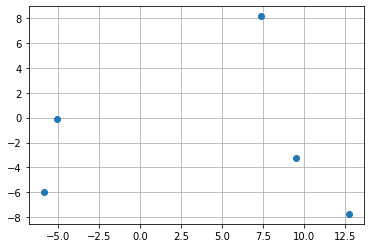

In [7]:
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
fig, ax = plt.subplots()
ax.plot(A[:,0], A[:,1], 'o')

ax.grid()

plt.show()

# test code

In [ ]:
'''
Default normalization (False) is by (N - 1), 
where N is the number of observations given (unbiased estimate). 
If bias is True, then normalization is by N.
'''
np.cov(D, y=None, bias=True, fweights=None, aweights=None)